# `unziper code`

In [50]:
# import zipfile

# # Path to your ZIP file
# zip_file_path = "img_align_celeba.zip"
# extract_to_path = "data" # Where you want to extract the files

# # Open and extract the ZIP file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to_path)

# print(f"Files extracted to: {extract_to_path}")


In [51]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms as T
import os
import numpy as np
from PIL import Image
from glob import glob

In [52]:
class CustomDataset(Dataset):
    def __init__(self, rood_dir, transform = None):
        
        self.rood_dir = rood_dir
        self.transform = transform
        self.image = glob(f"{rood_dir}/*.jpg")
    def __len__(self):
        return len(self.image)

    def __getitem__(self, idx):
        img = self.image[idx]
        img_data = Image.open(img).convert("RGB")

        if self.transform:
            im = self.transform(img_data)
            
        return im
        
img_path = "data/img_align_celeba"

trs = T.Compose([
    T.Resize(64),
    T.CenterCrop(64),
    T.ToTensor(),
    T.Normalize(mean= [0.5, 0.5, 0.5], std= [0.5, 0.5, 0.5])
])
dataset = CustomDataset(rood_dir = img_path, transform = trs )

#  DataLoader
dataloader = DataLoader(dataset, batch_size= 128, shuffle= True)
print(len(dataset))
print(len(dataloader))

    
   

88923
695


# Generatror

In [53]:
import torchvision
import numpy as np
import torch.nn as nn

# Generatror

class Generator(nn.Module):
    def __init__(self, z_dim = 100, img_channels = 3):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, img_channels*64*64),
            nn.Tanh()
        )
    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 3, 64, 64)
        return img

 # Discriminator

In [54]:
class Discriminator(nn.Module):
    def __init__(self, image_channels = 3):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(image_channels*64*64, 1024),
            nn.LeakyReLU(0.2, inplace= True),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace= True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace= True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, img):
        return self.model(img)
        

# Loss function and optimizer

In [55]:
adversarial_loss = nn.BCELoss()

generator  = Generator(z_dim=100)

discriminator = Discriminator()

opt_G = torch.optim.Adam(generator.parameters(), lr = 0.0002, betas = (0.5, 0.999))
opt_D = torch.optim.Adam(discriminator.parameters(), lr = 0.0002, betas = (0.5, 0.999))


device = "cuda" if torch.cuda.is_available() else "cpu"

generator = generator.to(device)
discriminator = discriminator.to(device)


# Training Loop

  0%|▏                                                                                 | 2/695 [00:00<03:03,  3.78it/s]

[Epoch 1/20] [Batch 0/695] [D loss: 0.6872574687004089] [G loss: 0.6887078285217285]


 15%|███████████▋                                                                    | 102/695 [00:18<01:47,  5.53it/s]

[Epoch 1/20] [Batch 100/695] [D loss: 0.17545223236083984] [G loss: 1.7103644609451294]


 29%|███████████████████████▎                                                        | 202/695 [00:43<01:44,  4.71it/s]

[Epoch 1/20] [Batch 200/695] [D loss: 0.0396069660782814] [G loss: 3.0987253189086914]


 43%|██████████████████████████████████▋                                             | 301/695 [01:05<01:16,  5.13it/s]

[Epoch 1/20] [Batch 300/695] [D loss: 0.04041118547320366] [G loss: 3.973780632019043]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:25<01:00,  4.86it/s]

[Epoch 1/20] [Batch 400/695] [D loss: 0.2593778371810913] [G loss: 2.404158592224121]


 72%|█████████████████████████████████████████████████████████▋                      | 501/695 [01:44<00:38,  5.02it/s]

[Epoch 1/20] [Batch 500/695] [D loss: 0.08458716422319412] [G loss: 4.205044269561768]


 86%|█████████████████████████████████████████████████████████████████████▏          | 601/695 [02:04<00:24,  3.89it/s]

[Epoch 1/20] [Batch 600/695] [D loss: 0.06342799216508865] [G loss: 4.860090255737305]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:22<00:00,  4.89it/s]


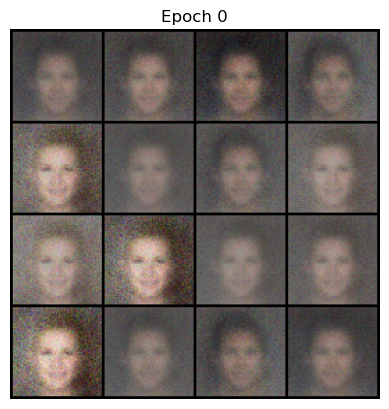

  0%|▏                                                                                 | 2/695 [00:00<02:14,  5.17it/s]

[Epoch 2/20] [Batch 0/695] [D loss: 0.07693901658058167] [G loss: 3.6819748878479004]


 15%|███████████▋                                                                    | 101/695 [00:19<01:50,  5.36it/s]

[Epoch 2/20] [Batch 100/695] [D loss: 0.14009399712085724] [G loss: 3.896987199783325]


 29%|███████████████████████▎                                                        | 202/695 [00:38<01:28,  5.55it/s]

[Epoch 2/20] [Batch 200/695] [D loss: 0.6843876838684082] [G loss: 1.8944110870361328]


 43%|██████████████████████████████████▊                                             | 302/695 [00:57<01:15,  5.21it/s]

[Epoch 2/20] [Batch 300/695] [D loss: 0.1892433762550354] [G loss: 5.275722503662109]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:15<00:53,  5.47it/s]

[Epoch 2/20] [Batch 400/695] [D loss: 0.2459477335214615] [G loss: 3.4878604412078857]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:34<00:36,  5.36it/s]

[Epoch 2/20] [Batch 500/695] [D loss: 0.12336625903844833] [G loss: 2.8688604831695557]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:54<00:17,  5.23it/s]

[Epoch 2/20] [Batch 600/695] [D loss: 0.4207170307636261] [G loss: 4.0255866050720215]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:11<00:00,  5.29it/s]


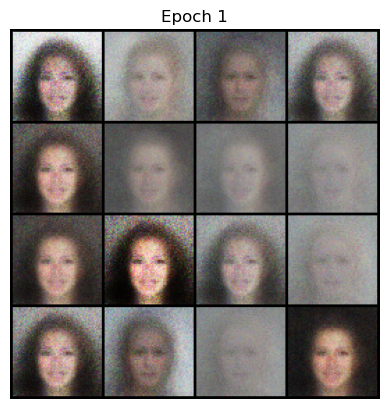

  0%|▏                                                                                 | 2/695 [00:00<02:29,  4.63it/s]

[Epoch 3/20] [Batch 0/695] [D loss: 0.13724397122859955] [G loss: 4.011411190032959]


 15%|███████████▋                                                                    | 102/695 [00:19<01:46,  5.57it/s]

[Epoch 3/20] [Batch 100/695] [D loss: 0.20742547512054443] [G loss: 5.559730529785156]


 29%|███████████████████████▎                                                        | 202/695 [00:38<01:34,  5.24it/s]

[Epoch 3/20] [Batch 200/695] [D loss: 0.23127537965774536] [G loss: 2.9059062004089355]


 43%|██████████████████████████████████▊                                             | 302/695 [00:57<01:14,  5.25it/s]

[Epoch 3/20] [Batch 300/695] [D loss: 0.2192486822605133] [G loss: 3.741367816925049]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:17<00:59,  4.92it/s]

[Epoch 3/20] [Batch 400/695] [D loss: 0.17753945291042328] [G loss: 2.6505391597747803]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:36<00:38,  5.01it/s]

[Epoch 3/20] [Batch 500/695] [D loss: 0.181635782122612] [G loss: 2.4125821590423584]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:55<00:18,  5.15it/s]

[Epoch 3/20] [Batch 600/695] [D loss: 0.2232714593410492] [G loss: 4.496393203735352]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:13<00:00,  5.20it/s]


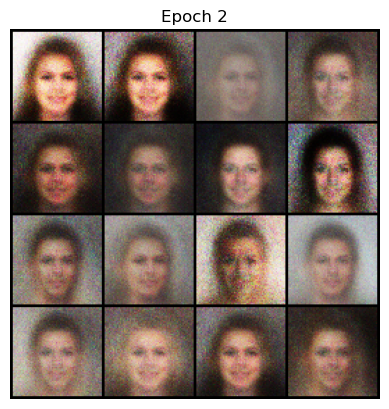

  0%|                                                                                  | 1/695 [00:00<02:34,  4.50it/s]

[Epoch 4/20] [Batch 0/695] [D loss: 0.2019379585981369] [G loss: 3.046557664871216]


 15%|███████████▋                                                                    | 102/695 [00:19<01:53,  5.22it/s]

[Epoch 4/20] [Batch 100/695] [D loss: 0.2375487983226776] [G loss: 2.8874592781066895]


 29%|███████████████████████▏                                                        | 201/695 [00:37<01:36,  5.13it/s]

[Epoch 4/20] [Batch 200/695] [D loss: 0.19284063577651978] [G loss: 3.0351855754852295]


 43%|██████████████████████████████████▊                                             | 302/695 [01:00<01:18,  5.02it/s]

[Epoch 4/20] [Batch 300/695] [D loss: 0.8142067790031433] [G loss: 2.8505499362945557]


 58%|██████████████████████████████████████████████▏                                 | 401/695 [01:20<01:46,  2.76it/s]

[Epoch 4/20] [Batch 400/695] [D loss: 0.20433413982391357] [G loss: 3.459019184112549]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:41<00:39,  4.94it/s]

[Epoch 4/20] [Batch 500/695] [D loss: 0.3186608552932739] [G loss: 3.7742810249328613]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [02:01<00:18,  5.06it/s]

[Epoch 4/20] [Batch 600/695] [D loss: 0.24183109402656555] [G loss: 2.7912049293518066]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:20<00:00,  4.93it/s]


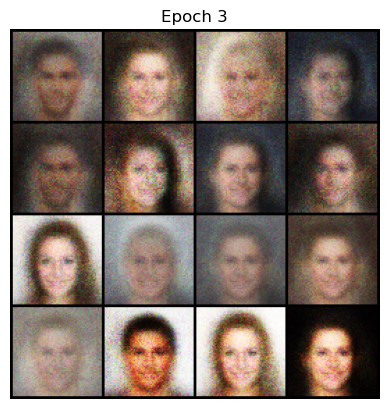

  0%|▏                                                                                 | 2/695 [00:00<02:14,  5.16it/s]

[Epoch 5/20] [Batch 0/695] [D loss: 0.3989951014518738] [G loss: 2.022712469100952]


 15%|███████████▋                                                                    | 102/695 [00:19<02:09,  4.59it/s]

[Epoch 5/20] [Batch 100/695] [D loss: 0.20092055201530457] [G loss: 2.9437789916992188]


 29%|███████████████████████▏                                                        | 201/695 [00:38<02:14,  3.67it/s]

[Epoch 5/20] [Batch 200/695] [D loss: 0.22090159356594086] [G loss: 3.6257872581481934]


 43%|██████████████████████████████████▊                                             | 302/695 [00:59<01:17,  5.06it/s]

[Epoch 5/20] [Batch 300/695] [D loss: 0.540111243724823] [G loss: 4.496322154998779]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:18<00:56,  5.17it/s]

[Epoch 5/20] [Batch 400/695] [D loss: 0.33540934324264526] [G loss: 2.1559431552886963]


 72%|█████████████████████████████████████████████████████████▋                      | 501/695 [01:37<00:39,  4.88it/s]

[Epoch 5/20] [Batch 500/695] [D loss: 0.3060958981513977] [G loss: 2.665188789367676]


 86%|█████████████████████████████████████████████████████████████████████▏          | 601/695 [01:58<00:20,  4.57it/s]

[Epoch 5/20] [Batch 600/695] [D loss: 0.2929409146308899] [G loss: 2.4638819694519043]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:18<00:00,  5.04it/s]


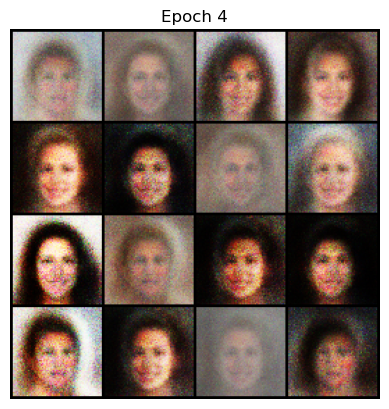

  0%|▏                                                                                 | 2/695 [00:00<02:24,  4.81it/s]

[Epoch 6/20] [Batch 0/695] [D loss: 0.36823228001594543] [G loss: 2.5035760402679443]


 15%|███████████▋                                                                    | 102/695 [00:22<01:54,  5.18it/s]

[Epoch 6/20] [Batch 100/695] [D loss: 0.2894347608089447] [G loss: 2.571617603302002]


 29%|███████████████████████▎                                                        | 202/695 [00:41<01:52,  4.36it/s]

[Epoch 6/20] [Batch 200/695] [D loss: 0.3272392749786377] [G loss: 2.9327232837677]


 43%|██████████████████████████████████▊                                             | 302/695 [01:02<01:23,  4.72it/s]

[Epoch 6/20] [Batch 300/695] [D loss: 0.31811824440956116] [G loss: 2.6119260787963867]


 58%|██████████████████████████████████████████████▏                                 | 401/695 [01:22<00:57,  5.08it/s]

[Epoch 6/20] [Batch 400/695] [D loss: 0.39216792583465576] [G loss: 2.3980534076690674]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:41<00:37,  5.11it/s]

[Epoch 6/20] [Batch 500/695] [D loss: 0.34825167059898376] [G loss: 2.026923656463623]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:59<00:17,  5.22it/s]

[Epoch 6/20] [Batch 600/695] [D loss: 0.3269883394241333] [G loss: 1.813805341720581]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:16<00:00,  5.08it/s]


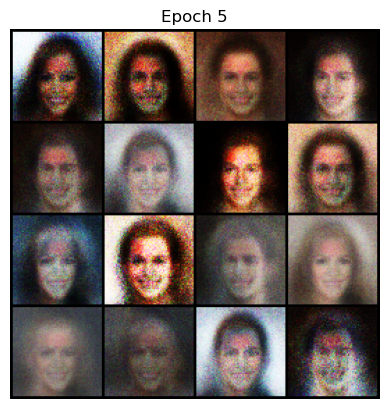

  0%|▏                                                                                 | 2/695 [00:00<02:20,  4.93it/s]

[Epoch 7/20] [Batch 0/695] [D loss: 0.45051708817481995] [G loss: 2.010737657546997]


 15%|███████████▋                                                                    | 102/695 [00:18<01:50,  5.38it/s]

[Epoch 7/20] [Batch 100/695] [D loss: 0.4182063937187195] [G loss: 1.7069694995880127]


 29%|███████████████████████▎                                                        | 202/695 [00:38<01:27,  5.61it/s]

[Epoch 7/20] [Batch 200/695] [D loss: 0.4781866669654846] [G loss: 1.842371940612793]


 43%|██████████████████████████████████▊                                             | 302/695 [00:57<01:17,  5.08it/s]

[Epoch 7/20] [Batch 300/695] [D loss: 0.4821052551269531] [G loss: 1.8446142673492432]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:15<00:53,  5.43it/s]

[Epoch 7/20] [Batch 400/695] [D loss: 0.40069741010665894] [G loss: 2.1220955848693848]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:34<00:34,  5.55it/s]

[Epoch 7/20] [Batch 500/695] [D loss: 0.3892365097999573] [G loss: 1.7011988162994385]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:53<00:17,  5.24it/s]

[Epoch 7/20] [Batch 600/695] [D loss: 0.3353387117385864] [G loss: 2.866820812225342]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:13<00:00,  5.21it/s]


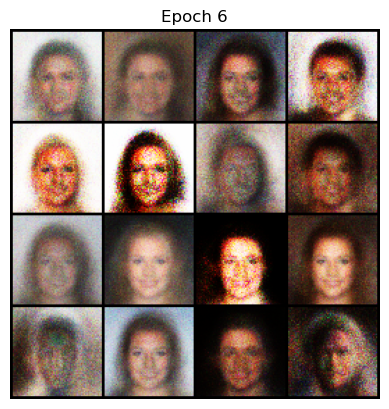

  0%|▏                                                                                 | 2/695 [00:00<02:23,  4.84it/s]

[Epoch 8/20] [Batch 0/695] [D loss: 0.47404950857162476] [G loss: 2.8059136867523193]


 15%|███████████▋                                                                    | 102/695 [00:19<01:46,  5.58it/s]

[Epoch 8/20] [Batch 100/695] [D loss: 0.4159926772117615] [G loss: 1.8143285512924194]


 29%|███████████████████████▎                                                        | 202/695 [00:38<01:33,  5.27it/s]

[Epoch 8/20] [Batch 200/695] [D loss: 0.4298534691333771] [G loss: 1.8019568920135498]


 43%|██████████████████████████████████▋                                             | 301/695 [00:59<01:32,  4.26it/s]

[Epoch 8/20] [Batch 300/695] [D loss: 0.43991371989250183] [G loss: 1.8921067714691162]


 58%|██████████████████████████████████████████████▏                                 | 401/695 [01:22<01:08,  4.30it/s]

[Epoch 8/20] [Batch 400/695] [D loss: 0.33894121646881104] [G loss: 1.7534890174865723]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:44<00:40,  4.74it/s]

[Epoch 8/20] [Batch 500/695] [D loss: 0.3136654198169708] [G loss: 2.3035809993743896]


 86%|█████████████████████████████████████████████████████████████████████▏          | 601/695 [02:09<00:28,  3.29it/s]

[Epoch 8/20] [Batch 600/695] [D loss: 0.47595295310020447] [G loss: 2.208718776702881]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:36<00:00,  4.45it/s]


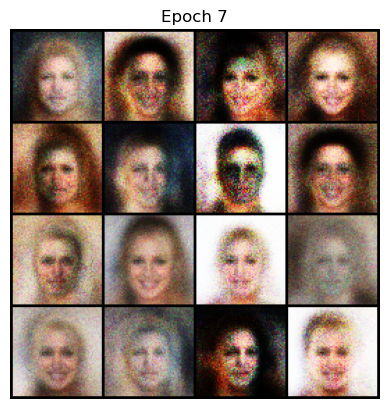

  0%|                                                                                  | 1/695 [00:00<02:29,  4.64it/s]

[Epoch 9/20] [Batch 0/695] [D loss: 0.42373475432395935] [G loss: 1.6973228454589844]


 15%|███████████▋                                                                    | 101/695 [00:19<02:01,  4.90it/s]

[Epoch 9/20] [Batch 100/695] [D loss: 0.421562135219574] [G loss: 2.1788671016693115]


 29%|███████████████████████▏                                                        | 201/695 [00:41<02:02,  4.04it/s]

[Epoch 9/20] [Batch 200/695] [D loss: 0.43449604511260986] [G loss: 2.1054015159606934]


 43%|██████████████████████████████████▊                                             | 302/695 [01:02<01:29,  4.38it/s]

[Epoch 9/20] [Batch 300/695] [D loss: 0.39540666341781616] [G loss: 1.967325210571289]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:21<00:54,  5.39it/s]

[Epoch 9/20] [Batch 400/695] [D loss: 0.4413624405860901] [G loss: 1.7160718441009521]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:40<00:33,  5.82it/s]

[Epoch 9/20] [Batch 500/695] [D loss: 0.4414404034614563] [G loss: 2.3586745262145996]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:59<00:18,  5.07it/s]

[Epoch 9/20] [Batch 600/695] [D loss: 0.3534696400165558] [G loss: 2.0556254386901855]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:18<00:00,  5.02it/s]


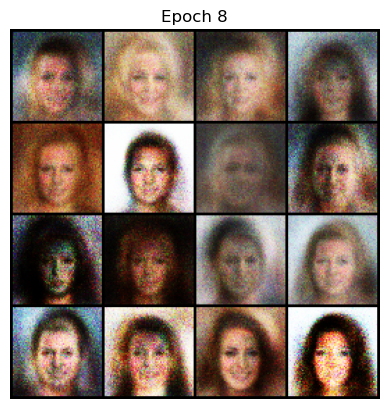

  0%|▏                                                                                 | 2/695 [00:00<02:20,  4.93it/s]

[Epoch 10/20] [Batch 0/695] [D loss: 0.418268620967865] [G loss: 2.2063474655151367]


 15%|███████████▋                                                                    | 101/695 [00:21<02:19,  4.26it/s]

[Epoch 10/20] [Batch 100/695] [D loss: 0.3715299367904663] [G loss: 2.209433078765869]


 29%|███████████████████████▎                                                        | 202/695 [00:43<01:40,  4.93it/s]

[Epoch 10/20] [Batch 200/695] [D loss: 0.46509212255477905] [G loss: 1.6922768354415894]


 43%|██████████████████████████████████▊                                             | 302/695 [01:05<01:26,  4.55it/s]

[Epoch 10/20] [Batch 300/695] [D loss: 0.3805365562438965] [G loss: 1.6974585056304932]


 58%|██████████████████████████████████████████████▏                                 | 401/695 [01:27<01:07,  4.33it/s]

[Epoch 10/20] [Batch 400/695] [D loss: 0.441213995218277] [G loss: 1.8221261501312256]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:50<00:40,  4.71it/s]

[Epoch 10/20] [Batch 500/695] [D loss: 0.47714945673942566] [G loss: 1.3960375785827637]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [02:10<00:18,  5.10it/s]

[Epoch 10/20] [Batch 600/695] [D loss: 0.5117166042327881] [G loss: 2.406966209411621]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:29<00:00,  4.65it/s]


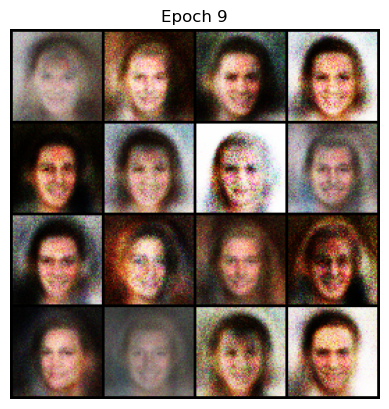

  0%|▏                                                                                 | 2/695 [00:00<02:22,  4.88it/s]

[Epoch 11/20] [Batch 0/695] [D loss: 0.44536906480789185] [G loss: 1.9320909976959229]


 15%|███████████▋                                                                    | 102/695 [00:21<01:55,  5.14it/s]

[Epoch 11/20] [Batch 100/695] [D loss: 0.4747343957424164] [G loss: 1.5750668048858643]


 29%|███████████████████████▏                                                        | 201/695 [00:41<01:53,  4.35it/s]

[Epoch 11/20] [Batch 200/695] [D loss: 0.45222437381744385] [G loss: 2.0371346473693848]


 43%|██████████████████████████████████▊                                             | 302/695 [01:01<01:09,  5.69it/s]

[Epoch 11/20] [Batch 300/695] [D loss: 0.539320707321167] [G loss: 1.703615665435791]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:22<00:57,  5.13it/s]

[Epoch 11/20] [Batch 400/695] [D loss: 0.42443567514419556] [G loss: 1.9306591749191284]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:40<00:32,  5.91it/s]

[Epoch 11/20] [Batch 500/695] [D loss: 0.5474890470504761] [G loss: 2.0366742610931396]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:58<00:15,  6.03it/s]

[Epoch 11/20] [Batch 600/695] [D loss: 0.5170680284500122] [G loss: 2.0159432888031006]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:14<00:00,  5.18it/s]


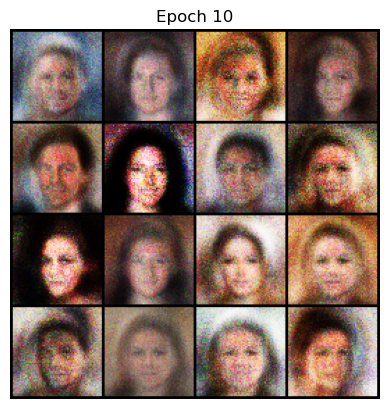

  0%|▏                                                                                 | 2/695 [00:00<02:16,  5.09it/s]

[Epoch 12/20] [Batch 0/695] [D loss: 0.451626718044281] [G loss: 1.9121966361999512]


 15%|███████████▋                                                                    | 102/695 [00:17<01:36,  6.13it/s]

[Epoch 12/20] [Batch 100/695] [D loss: 0.5190467834472656] [G loss: 1.2130646705627441]


 29%|███████████████████████▎                                                        | 202/695 [00:34<01:21,  6.04it/s]

[Epoch 12/20] [Batch 200/695] [D loss: 0.5211580991744995] [G loss: 1.685652256011963]


 43%|██████████████████████████████████▊                                             | 302/695 [00:52<01:15,  5.21it/s]

[Epoch 12/20] [Batch 300/695] [D loss: 0.4628641605377197] [G loss: 1.4921540021896362]


 58%|██████████████████████████████████████████████▏                                 | 401/695 [01:10<00:56,  5.19it/s]

[Epoch 12/20] [Batch 400/695] [D loss: 0.4821283221244812] [G loss: 1.7388317584991455]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:27<00:33,  5.82it/s]

[Epoch 12/20] [Batch 500/695] [D loss: 0.5037217140197754] [G loss: 1.5783747434616089]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:45<00:17,  5.30it/s]

[Epoch 12/20] [Batch 600/695] [D loss: 0.49503594636917114] [G loss: 1.5494557619094849]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:01<00:00,  5.74it/s]


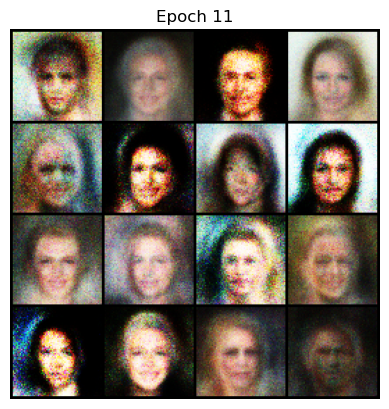

  0%|▏                                                                                 | 2/695 [00:00<02:11,  5.28it/s]

[Epoch 13/20] [Batch 0/695] [D loss: 0.5395168662071228] [G loss: 1.8670856952667236]


 15%|███████████▋                                                                    | 102/695 [00:19<01:46,  5.58it/s]

[Epoch 13/20] [Batch 100/695] [D loss: 0.4295375347137451] [G loss: 1.8198707103729248]


 29%|███████████████████████▎                                                        | 202/695 [00:37<01:41,  4.86it/s]

[Epoch 13/20] [Batch 200/695] [D loss: 0.43272602558135986] [G loss: 1.6723706722259521]


 43%|██████████████████████████████████▊                                             | 302/695 [00:54<01:06,  5.91it/s]

[Epoch 13/20] [Batch 300/695] [D loss: 0.5080338716506958] [G loss: 1.524377465248108]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:11<00:50,  5.85it/s]

[Epoch 13/20] [Batch 400/695] [D loss: 0.5159488916397095] [G loss: 1.7068493366241455]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:29<00:33,  5.85it/s]

[Epoch 13/20] [Batch 500/695] [D loss: 0.540170431137085] [G loss: 1.286953091621399]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:47<00:16,  5.68it/s]

[Epoch 13/20] [Batch 600/695] [D loss: 0.4834982752799988] [G loss: 1.4277215003967285]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:02<00:00,  5.66it/s]


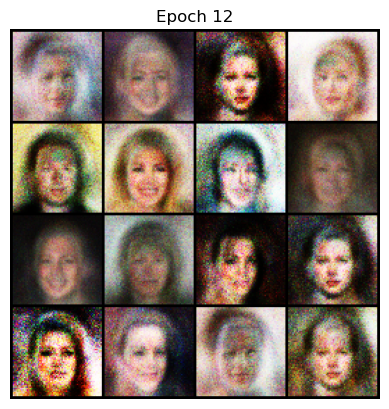

  0%|▏                                                                                 | 2/695 [00:00<02:02,  5.66it/s]

[Epoch 14/20] [Batch 0/695] [D loss: 0.45448505878448486] [G loss: 1.536355972290039]


 15%|███████████▋                                                                    | 102/695 [00:17<01:38,  6.05it/s]

[Epoch 14/20] [Batch 100/695] [D loss: 0.46633222699165344] [G loss: 1.454875111579895]


 29%|███████████████████████▎                                                        | 202/695 [00:34<01:29,  5.50it/s]

[Epoch 14/20] [Batch 200/695] [D loss: 0.4694828391075134] [G loss: 1.4386999607086182]


 43%|██████████████████████████████████▊                                             | 302/695 [00:50<01:03,  6.22it/s]

[Epoch 14/20] [Batch 300/695] [D loss: 0.47195881605148315] [G loss: 1.5025852918624878]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:08<00:49,  5.87it/s]

[Epoch 14/20] [Batch 400/695] [D loss: 0.5422757863998413] [G loss: 1.5550482273101807]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:25<00:34,  5.61it/s]

[Epoch 14/20] [Batch 500/695] [D loss: 0.5953564643859863] [G loss: 1.5755841732025146]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:42<00:15,  5.83it/s]

[Epoch 14/20] [Batch 600/695] [D loss: 0.5500063896179199] [G loss: 1.4046144485473633]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [01:58<00:00,  5.84it/s]


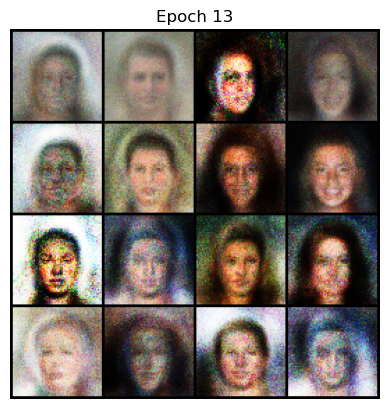

  0%|▏                                                                                 | 2/695 [00:00<02:16,  5.09it/s]

[Epoch 15/20] [Batch 0/695] [D loss: 0.46216076612472534] [G loss: 1.6658453941345215]


 15%|███████████▋                                                                    | 102/695 [00:17<01:45,  5.64it/s]

[Epoch 15/20] [Batch 100/695] [D loss: 0.5185795426368713] [G loss: 1.4387714862823486]


 29%|███████████████████████▎                                                        | 202/695 [00:34<01:21,  6.06it/s]

[Epoch 15/20] [Batch 200/695] [D loss: 0.5400347709655762] [G loss: 1.5522704124450684]


 43%|██████████████████████████████████▊                                             | 302/695 [00:51<01:05,  6.02it/s]

[Epoch 15/20] [Batch 300/695] [D loss: 0.4468596279621124] [G loss: 1.4431277513504028]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:07<00:50,  5.79it/s]

[Epoch 15/20] [Batch 400/695] [D loss: 0.4724072515964508] [G loss: 1.5024948120117188]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:24<00:32,  5.85it/s]

[Epoch 15/20] [Batch 500/695] [D loss: 0.4747855067253113] [G loss: 1.4823830127716064]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:40<00:16,  5.78it/s]

[Epoch 15/20] [Batch 600/695] [D loss: 0.5490410923957825] [G loss: 1.2811641693115234]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [01:56<00:00,  5.99it/s]


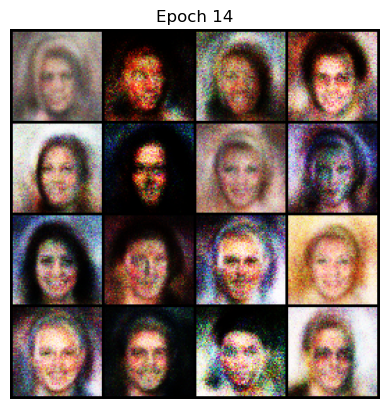

  0%|▏                                                                                 | 2/695 [00:00<01:58,  5.85it/s]

[Epoch 16/20] [Batch 0/695] [D loss: 0.47865229845046997] [G loss: 1.65821373462677]


 15%|███████████▋                                                                    | 102/695 [00:16<01:33,  6.31it/s]

[Epoch 16/20] [Batch 100/695] [D loss: 0.48357146978378296] [G loss: 1.4500906467437744]


 29%|███████████████████████▎                                                        | 202/695 [00:33<01:22,  5.97it/s]

[Epoch 16/20] [Batch 200/695] [D loss: 0.5185822248458862] [G loss: 1.505866289138794]


 43%|██████████████████████████████████▊                                             | 302/695 [00:50<01:05,  6.01it/s]

[Epoch 16/20] [Batch 300/695] [D loss: 0.4411177337169647] [G loss: 1.364253282546997]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:07<00:48,  6.03it/s]

[Epoch 16/20] [Batch 400/695] [D loss: 0.5708802938461304] [G loss: 1.4234635829925537]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:23<00:32,  5.91it/s]

[Epoch 16/20] [Batch 500/695] [D loss: 0.5050995945930481] [G loss: 1.443197250366211]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:40<00:15,  6.11it/s]

[Epoch 16/20] [Batch 600/695] [D loss: 0.6021939516067505] [G loss: 1.2106702327728271]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [01:55<00:00,  6.02it/s]


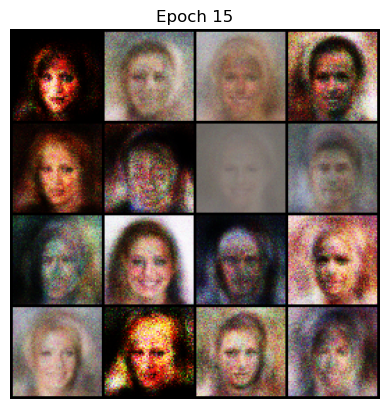

  0%|▏                                                                                 | 2/695 [00:00<01:59,  5.81it/s]

[Epoch 17/20] [Batch 0/695] [D loss: 0.5000461339950562] [G loss: 1.4385592937469482]


 15%|███████████▋                                                                    | 102/695 [00:16<01:41,  5.87it/s]

[Epoch 17/20] [Batch 100/695] [D loss: 0.5373353958129883] [G loss: 1.3863439559936523]


 29%|███████████████████████▎                                                        | 202/695 [00:33<01:24,  5.83it/s]

[Epoch 17/20] [Batch 200/695] [D loss: 0.5063781142234802] [G loss: 1.2401866912841797]


 43%|██████████████████████████████████▊                                             | 302/695 [00:50<01:09,  5.64it/s]

[Epoch 17/20] [Batch 300/695] [D loss: 0.5459470152854919] [G loss: 1.5684020519256592]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:07<00:50,  5.79it/s]

[Epoch 17/20] [Batch 400/695] [D loss: 0.4880102574825287] [G loss: 1.5151647329330444]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:24<00:32,  5.95it/s]

[Epoch 17/20] [Batch 500/695] [D loss: 0.5351519584655762] [G loss: 1.6494572162628174]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:41<00:16,  5.72it/s]

[Epoch 17/20] [Batch 600/695] [D loss: 0.5036345720291138] [G loss: 1.3727459907531738]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [01:57<00:00,  5.93it/s]


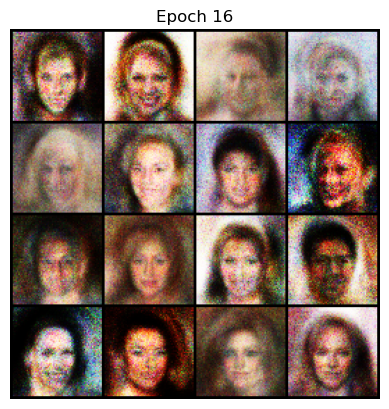

  0%|▏                                                                                 | 2/695 [00:00<02:19,  4.95it/s]

[Epoch 18/20] [Batch 0/695] [D loss: 0.5482704043388367] [G loss: 1.3855633735656738]


 15%|███████████▋                                                                    | 102/695 [00:17<01:46,  5.59it/s]

[Epoch 18/20] [Batch 100/695] [D loss: 0.6022603511810303] [G loss: 1.5035533905029297]


 29%|███████████████████████▎                                                        | 202/695 [00:34<01:22,  6.00it/s]

[Epoch 18/20] [Batch 200/695] [D loss: 0.5650875568389893] [G loss: 1.6271663904190063]


 43%|██████████████████████████████████▊                                             | 302/695 [00:51<01:05,  5.96it/s]

[Epoch 18/20] [Batch 300/695] [D loss: 0.551141619682312] [G loss: 1.4380154609680176]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:07<00:52,  5.59it/s]

[Epoch 18/20] [Batch 400/695] [D loss: 0.548874020576477] [G loss: 1.3675788640975952]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:24<00:31,  6.12it/s]

[Epoch 18/20] [Batch 500/695] [D loss: 0.5695803165435791] [G loss: 1.2709810733795166]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:41<00:15,  5.93it/s]

[Epoch 18/20] [Batch 600/695] [D loss: 0.48520028591156006] [G loss: 1.4538873434066772]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [01:57<00:00,  5.92it/s]


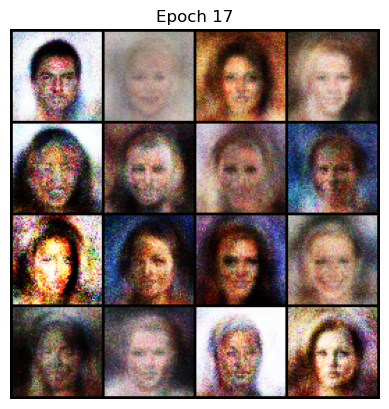

  0%|▏                                                                                 | 2/695 [00:00<02:12,  5.22it/s]

[Epoch 19/20] [Batch 0/695] [D loss: 0.5720541477203369] [G loss: 1.4699695110321045]


 15%|███████████▋                                                                    | 102/695 [00:17<01:37,  6.08it/s]

[Epoch 19/20] [Batch 100/695] [D loss: 0.5319230556488037] [G loss: 1.1622791290283203]


 29%|███████████████████████▎                                                        | 202/695 [00:34<01:29,  5.52it/s]

[Epoch 19/20] [Batch 200/695] [D loss: 0.5215126276016235] [G loss: 1.2505900859832764]


 43%|██████████████████████████████████▊                                             | 302/695 [00:50<01:03,  6.17it/s]

[Epoch 19/20] [Batch 300/695] [D loss: 0.5062679648399353] [G loss: 1.157122254371643]


 58%|██████████████████████████████████████████████▎                                 | 402/695 [01:08<00:52,  5.63it/s]

[Epoch 19/20] [Batch 400/695] [D loss: 0.6004592180252075] [G loss: 1.3997390270233154]


 72%|█████████████████████████████████████████████████████████▊                      | 502/695 [01:27<00:37,  5.20it/s]

[Epoch 19/20] [Batch 500/695] [D loss: 0.5834240317344666] [G loss: 1.4165598154067993]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [01:49<00:22,  4.07it/s]

[Epoch 19/20] [Batch 600/695] [D loss: 0.4958447813987732] [G loss: 1.3819177150726318]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:11<00:00,  5.29it/s]


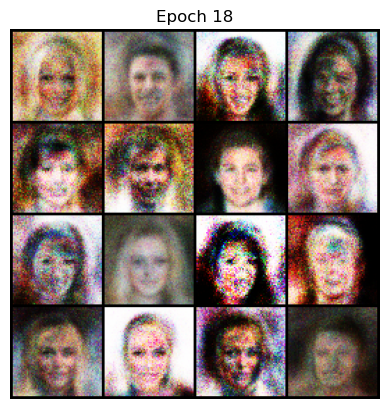

  0%|                                                                                  | 1/695 [00:00<03:14,  3.58it/s]

[Epoch 20/20] [Batch 0/695] [D loss: 0.5884584188461304] [G loss: 1.5049386024475098]


 15%|███████████▋                                                                    | 102/695 [00:21<02:21,  4.18it/s]

[Epoch 20/20] [Batch 100/695] [D loss: 0.5436599850654602] [G loss: 1.2646642923355103]


 29%|███████████████████████▏                                                        | 201/695 [00:43<01:49,  4.50it/s]

[Epoch 20/20] [Batch 200/695] [D loss: 0.545789897441864] [G loss: 1.5378401279449463]


 43%|██████████████████████████████████▋                                             | 301/695 [01:04<01:23,  4.71it/s]

[Epoch 20/20] [Batch 300/695] [D loss: 0.5317456722259521] [G loss: 1.2640578746795654]


 58%|██████████████████████████████████████████████▏                                 | 401/695 [01:28<01:04,  4.57it/s]

[Epoch 20/20] [Batch 400/695] [D loss: 0.527529239654541] [G loss: 1.4345808029174805]


 72%|█████████████████████████████████████████████████████████▋                      | 501/695 [01:51<01:02,  3.08it/s]

[Epoch 20/20] [Batch 500/695] [D loss: 0.5624616146087646] [G loss: 1.2259933948516846]


 87%|█████████████████████████████████████████████████████████████████████▎          | 602/695 [02:13<00:18,  4.92it/s]

[Epoch 20/20] [Batch 600/695] [D loss: 0.562163233757019] [G loss: 1.4118250608444214]


100%|████████████████████████████████████████████████████████████████████████████████| 695/695 [02:35<00:00,  4.47it/s]


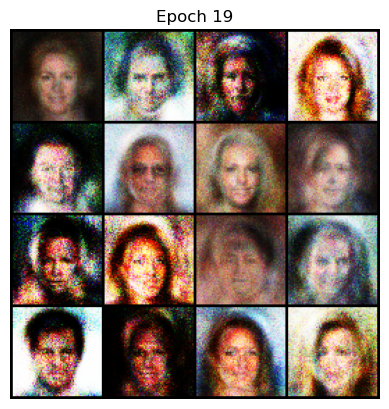

In [56]:
from tqdm import tqdm
def train(generator, discriminator, dataloader, epochs ):
    for epoch in range(epochs):
        for i, im in enumerate(tqdm(dataloader)):
            real_img = im.to(device)
            batch_size = real_img.size(0)
            valid = torch.ones(batch_size, 1).to(device)

            fake = torch.zeros(batch_size, 1).to(device)

            # Train discriminator
            opt_D.zero_grad()
            real_loss = adversarial_loss(discriminator(real_img), valid)

            fake_loss = adversarial_loss(discriminator(generator(torch.randn(batch_size, 100).to(device)).detach()), fake)

            d_loss = (real_loss+fake_loss)/2
            d_loss.backward()
            opt_D.step()


            # train Generator
            opt_G.zero_grad()
            g_loss = adversarial_loss(discriminator(generator(torch.randn(batch_size, 100).to(device))), valid)
            g_loss.backward()
            opt_G.step()

            if i % 100 ==0:
                
                print(f"[Epoch {epoch+1}/{epochs}] [Batch {i}/{len(dataloader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")
        save_generated_image(generator, epoch, device)

def save_generated_image(generator, epoch, device, num_image = 16):
    z = torch.randn(num_image, 100).to(device)
    generator_imgs= generator(z).detach().cpu()
    grid = torchvision.utils.make_grid(generator_imgs, nrow = 4, normalize=True)
    plt.imshow(np.transpose(grid, (1,2,0)))
    plt.title(f"Epoch {epoch+1}")
    plt.axis('off')
    plt.show()
train(generator, discriminator, dataloader , epochs= 20)